# ROC 曲线


在分类任务中，我们通常用一个**分类模型**来判断样本属于正类（1）还是负类（0）。

模型通常会输出一个 **概率值**（比如某个样本是正类的概率是 0.85），我们会设一个**阈值**（threshold），比如 0.5 来判断最终结果是否为正类。

但：**不同的阈值会影响模型的分类结果**。

所以，我们想知道：如果我把阈值从 0 调到 1，模型整体的表现如何变化？这正是 **ROC 曲线** 所展示的。


**1️⃣ 混淆矩阵（Confusion Matrix）**

|            | 实际为正类 | 实际为负类 |
| ---------- | ---------- | ---------- |
| 预测为正类 | TP         | FP         |
| 预测为负类 | FN         | TN         |

- **TP（True Positive）**：预测为正类，实际也是正类
- **FP（False Positive）**：预测为正类，实际是负类
- **FN（False Negative）**：预测为负类，实际是正类
- **TN（True Negative）**：预测为负类，实际是负类


**2️⃣ 主要指标**

| 指标名            | 公式           | 含义                     |
| ----------------- | -------------- | ------------------------ |
| **TPR**（真正率） | TP / (TP + FN) | 正类中预测正确的比例     |
| **FPR**（假正率） | FP / (FP + TN) | 负类中被误判为正类的比例 |

ROC 曲线就是画出：

```
FPR 为 x 轴
TPR 为 y 轴
```

每个点对应一个不同的阈值。


- **AUC（Area Under the Curve）** 是 ROC 曲线下的面积


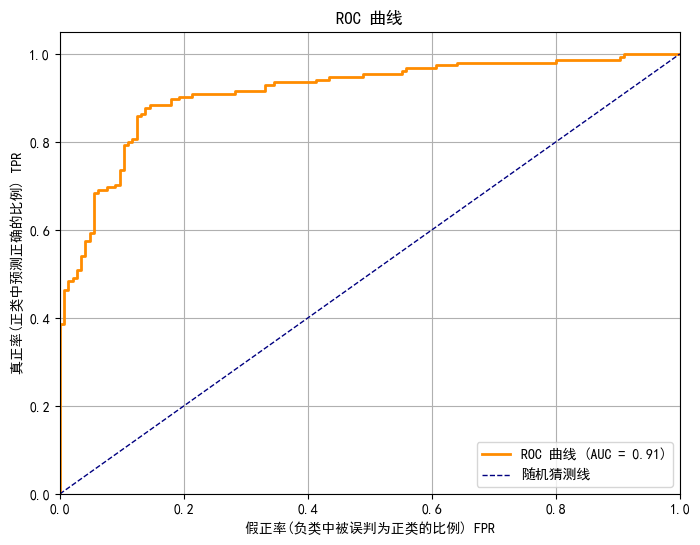

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

plt.rcParams["font.family"] = "SimHei"  # 设置中文字体（黑体）
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

# 1. 生成模拟的二分类数据
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. 训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. 预测概率（用于绘制 ROC）
y_probs = model.predict_proba(X_test)[:, 1]  # 取正类的概率

# 5. 计算 ROC 曲线和 AUC 值
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 6. 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC 曲线 (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--", label="随机猜测线")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("假正率(负类中被误判为正类的比例) FPR")
plt.ylabel("真正率(正类中预测正确的比例) TPR")
plt.title("ROC 曲线")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# PR 曲线


**PR 曲线是以：**

- 横轴：Recall（召回率 / True Positive Rate）
- 纵轴：Precision（精确率）

绘制的曲线，反映模型在不同 阈值（threshold）下的性能。

它强调模型对“**正类识别的能力**”以及“**正类预测的准确性**”。


**📘 二、PR 曲线中的两个关键指标**

| 名称                    | 公式           | 含义（通俗解释）                           |
| ----------------------- | -------------- | ------------------------------------------ |
| **精确率（Precision）** | TP / (TP + FP) | 被预测为正类的样本中，有多少是真正的正类   |
| **召回率（Recall）**    | TP / (TP + FN) | 所有真实正类中，有多少被模型正确预测为正类 |

**例子直观理解：**

假设模型预测了 10 个为正类，实际上只有 6 个是真正的正类：

- Precision = 6 / 10 = 0.6（准确度）
- 如果实际正类有 8 个，而模型只抓住了 6 个：

  - Recall = 6 / 8 = 0.75（覆盖率）

**🧠 三、PR 曲线如何绘制？**

1. 模型输出的是概率（不是直接的 0 或 1），比如“这个交易是欺诈的概率为 0.9”。
2. 改变阈值（从 1 到 0 逐渐降低），每个阈值下你可以计算出一个 `(Recall, Precision)` 点。
3. 将这些点连接起来，就形成了 PR 曲线。

**🎯 五、PR 曲线下面积：Average Precision（AP）**

PR 曲线下的面积就是：

> **AP（Average Precision）**

它可以看成是 PR 曲线的“加权平均”，用于整体上衡量模型的表现：

- AP ≈ 越接近 1，说明模型越优秀
- AP ≈ 正类比例时，说明模型很差


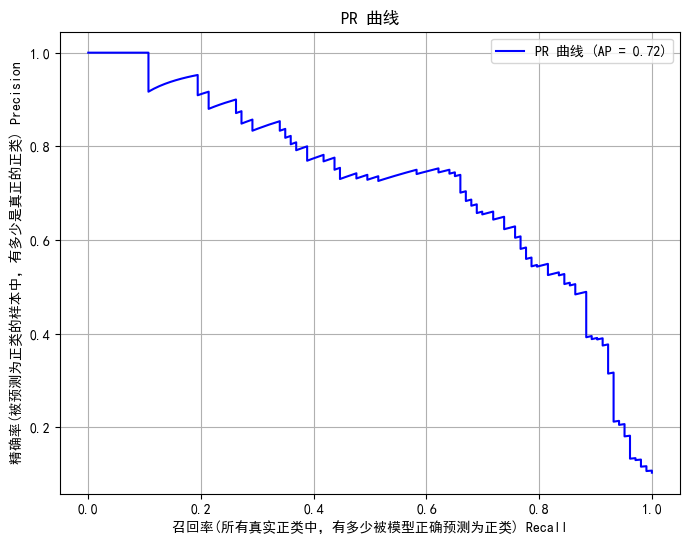

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.rcParams["font.family"] = "SimHei"  # 设置中文字体（黑体）
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

# **模拟不平衡数据**
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.9, 0.1],  # 不平衡
    n_features=20,
    random_state=42,
)

model = LogisticRegression()
model.fit(X, y)
y_probs = model.predict_proba(X)[:, 1]

# **计算 PR 曲线**
precision, recall, thresholds = precision_recall_curve(y, y_probs)
ap = average_precision_score(y, y_probs)

# **绘图**
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"PR 曲线 (AP = {ap:.2f})", color="blue")
plt.xlabel("召回率(所有真实正类中，有多少被模型正确预测为正类) Recall")
plt.ylabel("精确率(被预测为正类的样本中，有多少是真正的正类) Precision")
plt.title("PR 曲线")
plt.legend()
plt.grid(True)
plt.show()

# 斯皮尔曼等级相关系数（Spearman rank correlation coefficient）


**🧠 一、什么是 Spearman 相关系数？**

Spearman 相关系数（记作 $\rho$）用来衡量两个变量的**单调关系（monotonic relationship）**，也就是说：

> 如果一个变量增加，另一个变量也总是增加或总是减少，不要求是线性关系。

**📐 二、公式（简单版理解）**

它的计算基于**变量排名**而非原始数值：

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

其中：

- $d_i$ 是第 $i$ 个样本在两个变量中的排名差
- $n$ 是样本数量

如果两个变量的排名完全一致，则 $\rho = 1$；如果完全反向，$\rho = -1$。


In [3]:
from scipy.stats import spearmanr

x = [10, 20, 30, 40, 50]
y = [1, 2, 3, 4, 5]

corr, pval = spearmanr(x, y)

print(f"Spearman 相关系数: {corr:.2f}")
print(f"p 值: {pval:.4f}")

Spearman 相关系数: 1.00
p 值: 0.0000


**输出：**

- **相关系数 = 1.00**：说明两个变量排名完全一致
- **p 值越小越显著**：说明相关性不是偶然出现的（可解释为相关性显著）

**🧩 四、Spearman vs Pearson**

| 对比项         | Spearman（`spearmanr`）      | Pearson（`pearsonr`）    |
| -------------- | ---------------------------- | ------------------------ |
| 衡量关系类型   | 单调关系（不一定线性）       | 线性关系（直线趋势）     |
| 对异常值敏感性 | 抗干扰能力强，对异常值不敏感 | 非常敏感                 |
| 计算依据       | 基于排序（rank）             | 基于原始数值（mean/std） |

**✅ 五、适用场景**

- 数据不是线性关系（如：分数 vs 名次）
- 数据中含有异常值
- 你只关心变量是否“随着另一个上升/下降”，不关心上升速度
